# PCA

Examples from Chapter 44 of <i>Scientific Computation for Hackers: Python and the Jupyter Shell</i>

GPL license. 

In [11]:
import csv
import numpy as np

In [12]:
with open('gas-elect.csv', "r") as csvfile:
    datafile = csv.reader(csvfile, delimiter=',')
    g=[];e=[]
    for row in datafile:
        gas,elec=row
        gas=float(gas); elec=float(elec)
        try:
            g.append(gas); e.append(elec)
        except:
            continue
X=np.array([g,e]).T

In [14]:
def centerArray(M):
    mu = np.mean(M, 0)
    return M-mu

In [15]:
X=centerArray(X)
print(X)

[[-1.32008333e+00 -2.99166667e-02]
 [-1.24008333e+00 -2.99166667e-02]
 [-1.14608333e+00 -2.99166667e-02]
 [-1.07908333e+00 -2.99166667e-02]
 [-9.03083333e-01 -2.79166667e-02]
 [-8.71083333e-01 -2.19166667e-02]
 [-9.73083333e-01 -2.19166667e-02]
 [-1.01408333e+00 -2.09166667e-02]
 [-1.02108333e+00 -2.19166667e-02]
 [-8.83083333e-01 -2.69166667e-02]
 [-9.02083333e-01 -2.89166667e-02]
 [-1.03008333e+00 -2.89166667e-02]
 [-1.08908333e+00 -2.69166667e-02]
 [-9.94083333e-01 -2.69166667e-02]
 [-8.47083333e-01 -2.69166667e-02]
 [-6.29083333e-01 -2.59166667e-02]
 [-6.96083333e-01 -2.39166667e-02]
 [-7.36083333e-01 -1.69166667e-02]
 [-5.96083333e-01 -1.59166667e-02]
 [-4.06083333e-01 -1.59166667e-02]
 [ 1.49166667e-02 -1.49166667e-02]
 [-1.27083333e-01 -1.89166667e-02]
 [-5.69083333e-01 -1.89166667e-02]
 [-7.26083333e-01 -1.89166667e-02]
 [-5.97083333e-01 -1.29166667e-02]
 [-6.02083333e-01 -1.29166667e-02]
 [-5.11083333e-01 -1.19166667e-02]
 [-1.55083333e-01 -1.19166667e-02]
 [ 3.49166667e-02 -1

In [16]:
U, S, V=np.linalg.svd(X)
print("The first PC is ", V[0])
print("The second PC is ", V[1])

The first PC is  [0.99988131 0.01540671]
The second PC is  [-0.01540671  0.99988131]


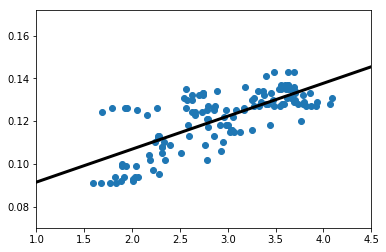

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
PC=V[0]
mug = np.average(g)
mue = np.average(e)
center=np.array([mug,mue])

P=center - 3*PC
Q=center + 3*PC

plt.plot([P[0],Q[0]], [P[1],Q[1]], color="k",linewidth=3) 
plt.scatter(g,e)
plt.xlim(1,4.5);

In [28]:
rawdata=np.array([[8.3, -41.0, 28.7],[ 6.5, -38.5, 29.5],
                  [0.5, -39.2, 28.6],[ 1.6, -41.8, 28.0],
                  [5.0, -37.6, 30.0],[-0.1, -40.3, 28.1],
                  [6.1, -42.2, 28.2]])

In [29]:
X=centerArray(rawdata)
np.round(X,2)

array([[ 4.31, -0.91, -0.03],
       [ 2.51,  1.59,  0.77],
       [-3.49,  0.89, -0.13],
       [-2.39, -1.71, -0.73],
       [ 1.01,  2.49,  1.27],
       [-4.09, -0.21, -0.63],
       [ 2.11, -2.11, -0.53]])

In [30]:
U, S, V = np.linalg.svd(X)
np.round(np.dot(X, V.T),2)

array([[-4.27, -1.09, -0.12],
       [-2.61,  1.62, -0.09],
       [ 3.47,  0.97, -0.1 ],
       [ 2.48, -1.73,  0.17],
       [-1.18,  2.72,  0.19],
       [ 4.13, -0.21, -0.11],
       [-2.01, -2.27,  0.06]])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
np.round(pca.fit_transform(X),2)

array([[ 4.27, -1.09],
       [ 2.61,  1.62],
       [-3.47,  0.97],
       [-2.48, -1.73],
       [ 1.18,  2.72],
       [-4.13, -0.21],
       [ 2.01, -2.27]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
np.round(pca.fit_transform(X),2)

array([[ 4.27, -1.09, -0.12],
       [ 2.61,  1.62, -0.09],
       [-3.47,  0.97, -0.1 ],
       [-2.48, -1.73,  0.17],
       [ 1.18,  2.72,  0.19],
       [-4.13, -0.21, -0.11],
       [ 2.01, -2.27,  0.06]])

In [33]:
pca.explained_variance_ratio_

array([0.76254115, 0.23613593, 0.00132292])